In [1]:
# For consistent results 
import numpy as np
import tensorflow as tf
import random as rn
import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [2]:
# Load the data
import pandas as pd
# import numpy as np

train_data = pd.read_csv(f"digit-recognizer/train.csv")
# display(train_data.head())

# Separate label and features
y = train_data.label
X = train_data.drop(columns=['label'])
print(X.shape)
print(y.shape)
X.describe()

(42000, 784)
(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
# Make train, cv, test splits
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.6)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, train_size=0.5)

print(f"X_train Shape:\t {X_train.shape}")
print(f"y_train Shape:\t {y_train.shape}")
print(f"X_cv Shape:\t {X_cv.shape}")
print(f"y_cv Shape:\t {y_cv.shape}")
print(f"X_test Shape:\t {X_test.shape}")
print(f"y_test Shape:\t {y_test.shape}")

X_train Shape:	 (25200, 784)
y_train Shape:	 (25200,)
X_cv Shape:	 (8400, 784)
y_cv Shape:	 (8400,)
X_test Shape:	 (8400, 784)
y_test Shape:	 (8400,)


In [4]:
# Make Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

normalizeColumns = ColumnTransformer([
    ("normalize_all", StandardScaler(), X_test.columns)
])

pipeline_1 = Pipeline(steps=[
    ("normalize", normalizeColumns)
])

X_train_transformed = pd.DataFrame(pipeline_1.fit_transform(X_train))
X_train_transformed.columns = X_train.columns
X_train_transformed.index = X_train.index
# X_train_transformed.describe()

y_train_transformed = y_train

X_cv_transformed = pd.DataFrame(pipeline_1.transform(X_cv))
X_cv_transformed.columns = X_cv.columns
X_cv_transformed.index = X_cv.index

y_cv_transformed = y_cv

In [6]:
# Train model, find best value of lambda
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy


# for _lambda in [0.1, 0.01, 0.001, 0.3, 0.5]:
#     model_1 = Sequential([
#         Input(shape=(784,)),
#         Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(_lambda), name='L1'),
#         Dense(units=16, activation='relu', name='L2'),
#         Dense(units=8, activation='relu', name='L3'),
#         Dense(units=4, activation='relu', name='L4'),
#         Dense(units=2, activation='relu', name='L5'),
#         Dense(units=10, activation='linear', name='L6'),
#     ])

#     model_1.compile(
#         optimizer='adam',
#         loss=SparseCategoricalCrossentropy(from_logits=True),
#         metrics=[SparseCategoricalAccuracy]
#     )

#     early_Stopping = EarlyStopping(
#         patience=20,
#         min_delta=0.001,
#         restore_best_weights=True
#     )

#     history=model_1.fit(X_train_transformed, y_train_transformed, 
#                 epochs=800,
#                 validation_data=(X_cv_transformed, y_cv_transformed),
#                 callbacks=[early_Stopping],
#                 batch_size=2048,
#                 verbose=False
#                 )

#     # Plot 
#     history_df = pd.DataFrame(history.history)
#     history_df.loc[:, ['loss','val_loss']].plot(title=f'lambda= {_lambda}')
#     history_df.loc[:, ['val_sparse_categorical_accuracy']].plot(title=f'lambda= {_lambda}')
#     print(f"Minimum validation loss: {history_df['val_loss'].min()} for lambda: {_lambda}")


In [22]:
# Andrew NG's model

model_ang = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.layers.Input(shape=(784,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')       
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model_ang.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[SparseCategoricalAccuracy]
)

early_Stopping = EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True
)

history = model_ang.fit(
    X_train_transformed,y_train_transformed,
    epochs=40,
    validation_data=(X_cv_transformed, y_cv_transformed),
    callbacks=[early_Stopping]
)

Epoch 1/40
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8947 - sparse_categorical_accuracy: 0.7178 - val_loss: 0.2623 - val_sparse_categorical_accuracy: 0.9225
Epoch 2/40
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2203 - sparse_categorical_accuracy: 0.9341 - val_loss: 0.2288 - val_sparse_categorical_accuracy: 0.9344
Epoch 3/40
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1618 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.2249 - val_sparse_categorical_accuracy: 0.9380
Epoch 4/40
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1293 - sparse_categorical_accuracy: 0.9622 - val_loss: 0.2331 - val_sparse_categorical_accuracy: 0.9389
Epoch 5/40
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.2379 - val_sparse_categorical_accuracy: 0.9417
Epoch 6/40
788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0889 - sparse_categorical_accuracy: 0.9753 - val_loss: 0.2552 - val_sparse_categorical_accuracy: 0.9436
Epoc

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])
Minimum validation loss: 0.2249208390712738


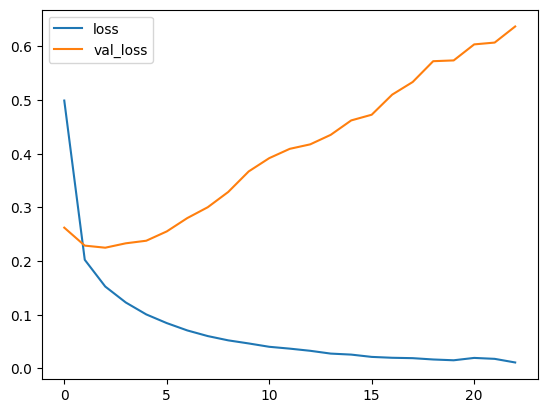

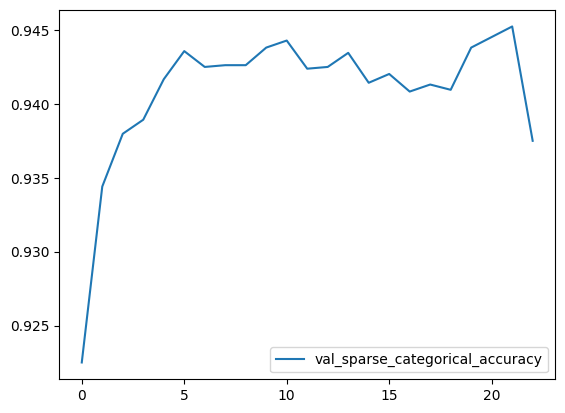

In [23]:
# Plot
history_df = pd.DataFrame(history.history)
print(history.history.keys())
history_df.loc[:, ['loss','val_loss']].plot()
history_df.loc[:, ['val_sparse_categorical_accuracy']].plot()
print(f"Minimum validation loss: {history_df['val_loss'].min()}")

In [24]:
# Train the final model on the entire data

X_full_transformed = pd.DataFrame(pipeline_1.transform(X))
X_full_transformed.columns = X.columns
X_full_transformed.index = X.index

y_full_transformed = y

model_final = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.layers.Input(shape=(784,)),
        Dense(units=25, activation='relu', name='L1'),
        Dense(units=15, activation='relu', name='L2'),
        Dense(units=10, activation='linear', name='L3')       
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)

model_final.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[SparseCategoricalAccuracy]
)

# early_Stopping = EarlyStopping(
#     patience=20,
#     min_delta=0.001,
#     restore_best_weights=True
# )

history = model_final.fit(
    X_full_transformed,y_full_transformed,
    epochs=21,
    # validation_data=(X_cv_transformed, y_cv_transformed),
    # callbacks=[early_Stopping]
)

# predict results
test = pd.read_csv("digit-recognizer/test.csv")
X_real_test = pd.DataFrame(pipeline_1.transform(test))
X_real_test.columns = test.columns
X_real_test.index = test.index

results = model_final.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("./predictions/try4_25Oct24.csv",index=False)


Epoch 1/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - loss: 0.7762 - sparse_categorical_accuracy: 0.7676
Epoch 2/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - loss: 0.2170 - sparse_categorical_accuracy: 0.9377
Epoch 3/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 0.1628 - sparse_categorical_accuracy: 0.9519
Epoch 4/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - loss: 0.1339 - sparse_categorical_accuracy: 0.9599
Epoch 5/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 0.1124 - sparse_categorical_accuracy: 0.9656
Epoch 6/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - loss: 0.0959 - sparse_categorical_accuracy: 0.9710
Epoch 7/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9744
Epoch 8/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 0.0762 - sparse_categorical_accuracy: 0.9776
Epoch 9/21
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 0.0703 - sparse_categorical_accuracy: 0.9798
Epoch 10/21
1313/13